# Analise Brasileirão 2023

## Obejetivo

Transformar os dados em informações relevantes para apostas em 2025

## Indice
- **ID**: ID da partida  
- **Rodada**: Rodada que aconteceu a partida  
- **Data**: Data que ocorreu a partida  
- **Horário**: Horário que ocorreu a partida  
- **Dia**: Dia da semana que ocorreu a partida  
- **Mandante**: Clube mandante  
- **Visitante**: Clube visitante  
- **formacao_mandante**: Formação do mandante  
- **formacao_visitante**: Formação do visitante  
- **tecnico_mandante**: Técnico do mandante  
- **tecnico_visitante**: Técnico do visitante  
- **Vencedor**: Clube vencedor da partida. Quando tiver "-", é um empate  
- **Arena**: Arena que ocorreu a partida  
- **Mandante Placar**: Gols que o clube mandante fez na partida  
- **Visitante Placar**: Gols que o clube visitante fez na partida  
- **Estado Mandante**: Estado do clube mandante  
- **Estado Visitante**: Estado do clube visitante  
- **Estado Vencedor**: Estado do clube vencedor. Quando tiver "-", é um empate  

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

from ydata_profiling import ProfileReport
from datetime import datetime


%matplotlib inline

In [6]:
# lendo o arquivo CSV
df = pd.read_csv('campeonato-brasileiro-full.csv')

# criando um perfil para o profile no df inteiro
prof = ProfileReport(df)

# criando uma pasta nova para savar o arquipo em HTML e ver na web
prof.to_file('analise.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.head(5)

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [8]:
# filtrando o DF para 2023
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
br_23 = df[df['data'].dt.year == 2023]

# deletando id
br_23 = br_23.drop(columns = ['ID'])

br_23.head(5)

,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
8025,1,2023-04-15,16:01,Palmeiras,Cuiaba,4-2-3-1,4-2-3-1,A. Moreira Ferreira,I. Abreu Vieira,Palmeiras,Allianz Parque,2,1,SP,MT
8026,1,2023-04-15,16:02,America-MG,Fluminense,4-2-3-1,4-2-2-2,V. Carmo Mancini,F. Diniz Silva,Fluminense,Estádio Raimundo Sampaio,0,3,MG,RJ
8027,1,2023-04-15,18:31,Bragantino,Bahia,4-2-3-1,3-4-3,P. Faria Caixinha,R. Alves Paiva,Bragantino,Nabizão,2,1,SP,BA
8028,1,2023-04-15,18:31,Athletico-PR,Goias,4-2-3-1,4-2-3-1,P. Turra,E. Rodrigues de Ávila,Athletico-PR,Ligga Arena,2,0,PR,GO
8029,1,2023-04-15,18:32,Fortaleza,Internacional,4-2-2-2,4-2-3-1,J. Vojvoda,L. Venker de Menezes,-,Arena Castelão,1,1,CE,RS


In [9]:
# removendo empates
br_23 = br_23.drop(br_23[br_23['vencedor'] == '-'].index)

## Exploração

In [11]:
print(br_23['hora'].min())
print(br_23['hora'].max())

11:00
22:00


In [12]:
# verificando NA
br_23.isna().sum()

rodata                0
data                  0
hora                  0
mandante              0
visitante             0
formacao_mandante     0
formacao_visitante    0
tecnico_mandante      0
tecnico_visitante     0
vencedor              0
arena                 0
mandante_Placar       0
visitante_Placar      0
mandante_Estado       0
visitante_Estado      0
dtype: int64

In [13]:
# categorizando data
br_23['hora'] = pd.to_datetime(br_23['hora'], format='%H:%M').dt.time

# Definir os limites de horário
limites = [
    ('09:00', '13:00', 'Manhã'),
    ('13:01', '20:41', 'Tarde'),
    ('20:42', '22:35', 'Noite'),
]

# Criar lista de condições e valores
condicoes = []
valores = []

# Usar datetime.strptime para comparar corretamente
for inicio, fim, categoria in limites:
    inicio_time = datetime.strptime(inicio, '%H:%M').time()
    fim_time = datetime.strptime(fim, '%H:%M').time()
    condicoes.append((br_23['hora'] >= inicio_time) & (br_23['hora'] <= fim_time))
    valores.append(categoria)

# Aplicar categorização
br_23['categoria_hora'] = np.select(condicoes, valores, default=-1)  # Default -1 para fora dos intervalos

# Exibir resultado
print(br_23[['hora', 'categoria_hora']])

          hora categoria_hora
8025  16:01:00          Tarde
8026  16:02:00          Tarde
8027  18:31:00          Tarde
8028  18:31:00          Tarde
8030  18:33:00          Tarde
...        ...            ...
8400  21:32:00          Noite
8401  21:32:00          Noite
8402  21:32:00          Noite
8403  21:32:00          Noite
8404  21:32:00          Noite

[282 rows x 2 columns]


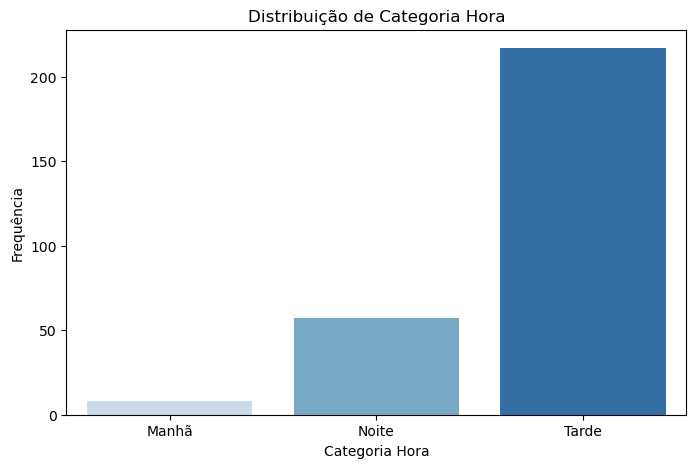

In [14]:
# Contar a frequência de cada categoria
categoria_counts = br_23['categoria_hora'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x=categoria_counts.index, y=categoria_counts.values, hue=categoria_counts.index, palette='Blues', legend=False)

# Adicionar rótulos
plt.xlabel('Categoria Hora')
plt.ylabel('Frequência')
plt.title('Distribuição de Categoria Hora')

# Exibir o gráfico (para Jupyter, use %matplotlib inline antes)
plt.show()

In [15]:
# Contar as ocorrências de cada categoria
categoria_counts = br_23['categoria_hora'].value_counts()

# Calcular a porcentagem
categoria_percentual = (categoria_counts / categoria_counts.sum()) * 100

# Exibir os resultados
print(categoria_percentual)

categoria_hora
Tarde    76.950355
Noite    20.212766
Manhã     2.836879
Name: count, dtype: float64


### Cerca de 80% dos jogos foram realizados no horario da tarde.

### Maior vencedor da tarde é o Gremio, seguido de Botafogo, Flamengo e Palmeiras.

In [18]:
# verificando maiores vencedores na faixa de jogos de tarde
br_ano_filtrado = br_23[br_23['categoria_hora']=='Tarde']
br_ano_filtrado['vencedor'].value_counts().head(5)

vencedor
Gremio          16
Botafogo-RJ     15
Flamengo        15
Palmeiras       14
Athletico-PR    13
Name: count, dtype: int64

### Maior vencedor da noite é o Atletico-MG seguido de Palmeiras, Fluminence e Vasco.

In [20]:
# verificando maiores vencedores na faixa de jogos de noite
br_filtrado2 = br_23[br_23['categoria_hora']=='Noite']
br_filtrado2['vencedor'].value_counts().head(5)

vencedor
Atletico-MG    8
Palmeiras      6
Fluminense     5
Vasco          4
Bahia          4
Name: count, dtype: int64

### Maior vencedor da manhã é o Bragantino

In [22]:
# verificando maiores vencedores na faixa de jogos de manhã
br_filtrado3 = br_23[br_23['categoria_hora']=='Manhã']
br_filtrado3['vencedor'].value_counts().head(5)

vencedor
Bragantino       2
Internacional    1
Cuiaba           1
Santos           1
Atletico-MG      1
Name: count, dtype: int64

In [23]:
br_23['vencedor'].unique()

array(['Palmeiras', 'Fluminense', 'Bragantino', 'Athletico-PR',
       'Botafogo-RJ', 'Vasco', 'Flamengo', 'Corinthians', 'Gremio',
       'Sao Paulo', 'Cruzeiro', 'Internacional', 'Fortaleza', 'Goias',
       'Santos', 'Atletico-MG', 'Bahia', 'Cuiaba', 'America-MG',
       'Coritiba'], dtype=object)